---
---
# **Prosper Loan Data Visualization**
---
---

**Bright Alorwoyie**
---
---

In [1]:
# importing loan status illustration
from IPython.display import Image

# get the image
Image(url="https://www.financialexpress.com/wp-content/uploads/2022/01/1-132.jpg", width=1000, height=800)

Source: [Financial Express](https://www.financialexpress.com/wp-content/uploads/2022/01/1-132.jpg)

---
---
## **Introdction**
---
- This project analyses a loan dataset from prosper which can be downloaded from the [Udacity workspace](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000).

- The dataset contains 113,937 rows with 81 columns (depicting different variables related to each loan processed).
- Explanations on each of the variables represented by the columns can be founded in the Data dictionary [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0/ "Data Dictionary")


---
### **Questions for consideration**
---
1. What factors influence the outcome status of a loan?
2. What factors influence the borrower's APR or interest rate?
3. Are there differences in loans based on the initial loan amount?
4. How does credit score ratings affect the interest charged on loans?
5. Does term/duration of loan influence the amount of interest charged?

---

In [2]:
!pip install plotly

In [3]:
# import all relevant packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

In [4]:
# load in the dataset into a pandas dataframe

df_main = pd.read_csv("prosperLoanData.csv")

**Acquainting with the dataset by visually Inpecting the first five rows of the dataframe, checking the shape and the columns**


In [5]:
# checking the first five rows of the dataframe
df_main.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [6]:
# Checking the shape of the dataframe
df_main.shape

(113937, 81)

- The data contains 113937 rows of loan entries and 81 different characterics

In [7]:
# checking the variable names to determine the useful ones for the analysis
df_main.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

**Choosing specific variables necessary for our analysis**

- The following columns will be selected for the analysis. They deal with the loan's size, due dates, interest rates, and other borrower characteristics.

In [8]:
# Slicing relevant columns for the analysis
df = df_main.loc[:, ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
                         'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent', 'DebtToIncomeRatio',
                         'LoanOriginalAmount',  'MonthlyLoanPayment', 'Investors']]
                         

In [9]:
# checking the first three rows of the new dataframe
df.head(3)

ListingCreationDate  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0  2007-08-26 19:09:29.263000000    36  Completed      0.16516         0.158   
1  2014-02-27 08:28:07.900000000    36    Current      0.12016         0.092   
2  2007-01-05 15:00:47.090000000    36  Completed      0.28269         0.275   

   LenderYield ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)  \
0        0.138                   NaN           NaN                          0   
1        0.082                     A           7.0                          2   
2        0.240                   NaN           NaN                          0   

  BorrowerState  ... EmploymentStatus AmountDelinquent     IncomeRange  \
0            CO  ...    Self-employed            472.0  $25,000-49,999   
1            CO  ...         Employed              0.0  $50,000-74,999   
2            GA  ...    Not available              NaN   Not displayed   

  IncomeVerifiable  StatedMonthlyIncome  LoanCurrentDaysDelinquent  \
0             True          3083.333333                          0   
1             True          6125.000000                          0   
2             True          2083.333333                          0   

   DebtToIncomeRatio  LoanOriginalAmount  MonthlyLoanPayment  Investors  
0               0.17                9425              330.43        258  
1               0.18               10000              318.93          1  
2               0.06                3001              123.32         41  

[3 rows x 21 columns]

In [10]:
# checking the meta info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   BorrowerState              108422 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  AmountDelinquent           106315 non-null  float64
 13  IncomeRange                11

In [11]:
# checking for duplicates
df.duplicated().sum()

0

In [12]:
# checking for null values

df.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
DebtToIncomeRatio             8554
LoanOriginalAmount               0
MonthlyLoanPayment               0
Investors                        0
dtype: int64

In [13]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [14]:
# checking the summary statistics

df.describe()

Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113912.000000  113937.000000  113937.000000   
mean       40.830248       0.218828       0.192764       0.182701   
std        10.436212       0.080364       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283810       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       ProsperScore  ListingCategory (numeric)  AmountDelinquent  \
count  84853.000000              113937.000000     106315.000000   
mean       5.950067                   2.774209        984.507059   
std        2.376501                   3.996797       7158.270157   
min        1.000000                   0.000000          0.000000   
25%        4.000000                   1.000000          0.000000   
50%        6.000000                   1.000000          0.000000   
75%        8.000000                   3.000000          0.000000   
max       11.000000                  20.000000     463881.000000   

       StatedMonthlyIncome  LoanCurrentDaysDelinquent  DebtToIncomeRatio  \
count         1.139370e+05              113937.000000      105383.000000   
mean          5.608026e+03                 152.816539           0.275947   
std           7.478497e+03                 466.320254           0.551759   
min           0.000000e+00                   0.000000           0.000000   
25%           3.200333e+03                   0.000000           0.140000   
50%           4.666667e+03                   0.000000           0.220000   
75%           6.825000e+03                   0.000000           0.320000   
max           1.750003e+06                2704.000000          10.010000   

       LoanOriginalAmount  MonthlyLoanPayment      Investors  
count        113937.00000       113937.000000  113937.000000  
mean           8337.01385          272.475783      80.475228  
std            6245.80058          192.697812     103.239020  
min            1000.00000            0.000000       1.000000  
25%            4000.00000          131.620000       2.000000  
50%            6500.00000          217.740000      44.000000  
75%           12000.00000          371.580000     115.000000  
max           35000.00000         2251.510000    1189.000000

### Summary of observations
From the meta info displayed above, it can be observed that
- ClosedDate, ProsperRating (Alpha), ProsperScore, BorrowerState, Occupation, EmploymentStatus, AmountDelinquent,  OnTimeProsperPayments have missing values
- This will be appropriately dealt with in later sessions of the work
- Listing creation date is supposed to be date time
- ClosedDate is supposed to be datetime
- LoanOriginationDate is supposed to be datetime

## Data Cleaning

In [15]:
#Changing the datatype of Datetime columns
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate).astype('datetime64')

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   BorrowerAPR                113912 non-null  float64       
 4   BorrowerRate               113937 non-null  float64       
 5   LenderYield                113937 non-null  float64       
 6   ProsperRating (Alpha)      84853 non-null   object        
 7   ProsperScore               84853 non-null   float64       
 8   ListingCategory (numeric)  113937 non-null  int64         
 9   BorrowerState              108422 non-null  object        
 10  Occupation                 110349 non-null  object        
 11  EmploymentStatus           111682 non-null  object  

In [16]:
df.AmountDelinquent.value_counts()

0.0        89818
50.0          73
100.0         67
25.0          66
30.0          65
           ...  
14910.0        1
1280.0         1
13180.0        1
2023.0         1
5062.0         1
Name: AmountDelinquent, Length: 7059, dtype: int64

In [17]:
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].fillna('N/A')
df.ProsperScore = df.ProsperScore.fillna('N/A')
df.AmountDelinquent = df.AmountDelinquent.fillna('No Prior Loan')
df.dropna(axis=0, inplace=True)

df.isnull().sum()

ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
ProsperRating (Alpha)        0
ProsperScore                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
AmountDelinquent             0
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
LoanCurrentDaysDelinquent    0
DebtToIncomeRatio            0
LoanOriginalAmount           0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

In [18]:
df.IncomeRange.value_counts()

$50,000-74,999    28614
$25,000-49,999    28609
$100,000+         15870
$75,000-99,999    15739
$1-24,999          5866
Not displayed      2998
Not employed         56
Name: IncomeRange, dtype: int64

In [19]:
df['ProsperRating (Alpha)'].value_counts()

N/A    21528
C      16501
B      14379
A      13491
D      12631
E       8443
HR      5682
AA      5097
Name: ProsperRating (Alpha), dtype: int64

In [20]:
# Convert ProsperRating and IncomeRange to ordinal categories 
ordinal_variables = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['Not employed', 'Not displayed', '$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}
# creating a loop for the ordering of each variable
for var in ordinal_variables:
    order = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_variables[var])
    df[var] = df[var].astype(order)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97752 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingCreationDate        97752 non-null  datetime64[ns]
 1   Term                       97752 non-null  int64         
 2   LoanStatus                 97752 non-null  object        
 3   BorrowerAPR                97752 non-null  float64       
 4   BorrowerRate               97752 non-null  float64       
 5   LenderYield                97752 non-null  float64       
 6   ProsperRating (Alpha)      97752 non-null  category      
 7   ProsperScore               97752 non-null  object        
 8   ListingCategory (numeric)  97752 non-null  int64         
 9   BorrowerState              97752 non-null  object        
 10  Occupation                 97752 non-null  object        
 11  EmploymentStatus           97752 non-null  object        
 12  Amo

In [21]:
df.IncomeRange.value_counts()

$50,000-74,999    28614
$25,000-49,999    28609
$100,000+         15870
$75,000-99,999    15739
$1-24,999          5866
Not displayed      2998
Not employed         56
Name: IncomeRange, dtype: int64

In [22]:
df.head()

ListingCreationDate  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0 2007-08-26 19:09:29.263    36  Completed      0.16516        0.1580   
1 2014-02-27 08:28:07.900    36    Current      0.12016        0.0920   
2 2007-01-05 15:00:47.090    36  Completed      0.28269        0.2750   
3 2012-10-22 11:02:35.010    36    Current      0.12528        0.0974   
4 2013-09-14 18:38:39.097    36    Current      0.24614        0.2085   

   LenderYield ProsperRating (Alpha) ProsperScore  ListingCategory (numeric)  \
0       0.1380                   N/A          N/A                          0   
1       0.0820                     A          7.0                          2   
2       0.2400                   N/A          N/A                          0   
3       0.0874                     A          9.0                         16   
4       0.1985                     D          4.0                          2   

  BorrowerState  ... EmploymentStatus AmountDelinquent     IncomeRange  \
0            CO  ...    Self-employed            472.0  $25,000-49,999   
1            CO  ...         Employed              0.0  $50,000-74,999   
2            GA  ...    Not available    No Prior Loan   Not displayed   
3            GA  ...         Employed          10056.0  $25,000-49,999   
4            MN  ...         Employed              0.0       $100,000+   

  IncomeVerifiable  StatedMonthlyIncome  LoanCurrentDaysDelinquent  \
0             True          3083.333333                          0   
1             True          6125.000000                          0   
2             True          2083.333333                          0   
3             True          2875.000000                          0   
4             True          9583.333333                          0   

   DebtToIncomeRatio  LoanOriginalAmount  MonthlyLoanPayment  Investors  
0               0.17                9425              330.43        258  
1               0.18               10000              318.93          1  
2               0.06                3001              123.32         41  
3               0.15               10000              321.45        158  
4               0.26               15000              563.97         20  

[5 rows x 21 columns]

In [23]:
#Changing datatypes of the categorical variables from object
df.Occupation = df.Occupation.astype('category')
df.LoanStatus = df.LoanStatus.astype('category')
df.BorrowerState = df.BorrowerState.astype('category')
df.EmploymentStatus = df.EmploymentStatus.astype('category')
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97752 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingCreationDate        97752 non-null  datetime64[ns]
 1   Term                       97752 non-null  int64         
 2   LoanStatus                 97752 non-null  category      
 3   BorrowerAPR                97752 non-null  float64       
 4   BorrowerRate               97752 non-null  float64       
 5   LenderYield                97752 non-null  float64       
 6   ProsperRating (Alpha)      97752 non-null  category      
 7   ProsperScore               97752 non-null  object        
 8   ListingCategory (numeric)  97752 non-null  category      
 9   BorrowerState              97752 non-null  category      
 10  Occupation                 97752 non-null  category      
 11  EmploymentStatus           97752 non-null  category      
 12  Amo

In [24]:
df.shape

(97752, 21)

## What is the structure of your dataset?

- There are 21 columns and 97752 rows in the dataset. The majority of the columns are numerical, but we also include date/time variables and category categories (both nominal and ordinal).

### What is/are the main feature(s) of interest in your dataset?
**The key features of interest in the dataset are:**
- LoanStatus
- Term
- BorrowerRate 
- BorrowerAPR 
- ProsperScore
- OriginalLoanAmount
- MonthlyLoanPayment
- Borrower
- Occupation
- BorrowerState
- ListingCategory
- DebtToIncomeRatio
- LoanOriginalAmount
- and others if needed.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Factors that helped my investigation into the features of interest include LoanStatus, MonthlyPayment and EmploymentStatus

## Univariate Exploration
- I will start by looking at Borrower APR and Borrower's Rate
 - BorrowerAPR : The Borrower's Annual Percentage Rate (APR) for the loan.
 - BorrowerRate : The Borrower's interest rate for this loan.

In [25]:
df.BorrowerAPR.max()

0.42395

In [26]:
df['BorrowerRate'].max()

0.36

**Question**

---
- What is the distribution of BorrowerAPR and BorrowerRate?

---

**Visualization**

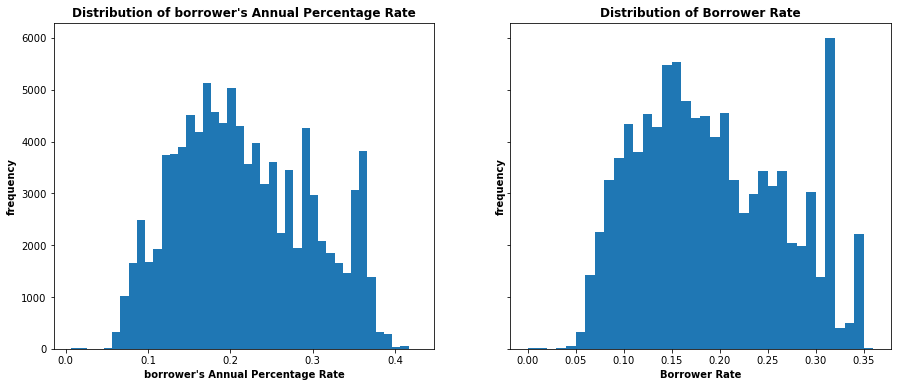

In [27]:
fig, ax = plt.subplots(1,2, sharey=True, figsize = [15,6])
plt.subplot(1, 2, 1)
apr_bins = np.arange(df.BorrowerAPR.min(), df.BorrowerAPR.max()+0.01, 0.01)
plt.hist(data=df, x='BorrowerAPR', bins=apr_bins);
plt.xlabel('borrower\'s Annual Percentage Rate', weight='bold');
plt.title('Distribution of borrower\'s Annual Percentage Rate', weight='bold');
plt.ylabel('frequency', weight='bold');

plt.subplot(1, 2, 2)
rate_bins = np.arange(df['BorrowerRate'].min(), df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data=df, x='BorrowerRate', bins=rate_bins)
plt.xlabel('Borrower Rate', weight='bold');
plt.ylabel('frequency', weight='bold');
plt.title('Distribution of Borrower Rate', weight='bold');

**Observation**
---
Both Borrowers' APR and Borrowers' Rate tend to have a normal distribution and and densed between 0.1 and 0.2. However, the distribution of their modal values seems different. APR's mode is between 0.1 and 0.2 whereas Borrower's Rate mode is between 0.3 and 0.35

**Question**

---
---
- What is the distribution of Loan terms in months?

In [85]:
def myCountPlot(df, xVar, order=None, color=sb.color_palette()[0]):
    '''
    This function plots countplots of selected variables
    It takes a categorical variable from a dataframe and returns a plot 
    with frequences of the number of occurrences of each unit.
    '''
    # set plot dimensions
    plt.figure(figsize=[14,6])
    # plot
    c=sb.countplot(data=df, x =xVar, edgecolor = 'black', order=order, color=color);
    # clean up variable names after plotting
    xVar=xVar.replace("_"," ") # replace _ with a space
    # Add title and format it
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize=14, weight='bold')
    # Add x label and format it
    plt.xlabel(f'{xVar}'.title(), fontsize =10, weight = 'bold')
    # Add x label and format it
    plt.ylabel('Number of people'.title(), fontsize =10, weight = 'bold')
        # annotate plot
    for p in c.patches:
        c.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x()+p.get_width()/2,p.get_height()),
                  fontsize=12, weight='bold',
                  va='bottom', ha='center') # vertical alignment and horizontal alignment of text
        # despine
        sb.despine();

 

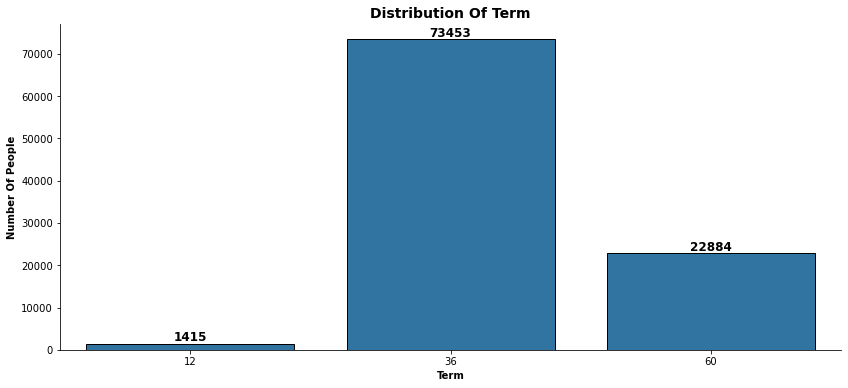

In [86]:
# Calling plot function
myCountPlot(df, 'Term')

**Observation**

Most of the borrowers prefer a loan term of 36 months

**Question**

---
---
- What is the distribution of PrsoperScore?

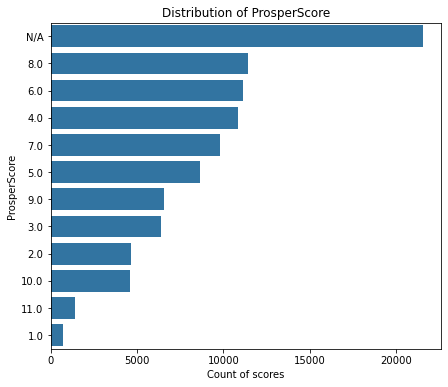

In [30]:
#Plotting the distribution of Prosper Score
plt.figure(figsize = (7,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y= 'ProsperScore', color=base_color, order=df.ProsperScore.value_counts().index)
plt.title('Distribution of ProsperScore')
plt.xlabel('Count of scores');

**Observation**
- The N/A represents the aggregation of loans before July 2009
- From the distribution, most of the people were given the score of 8.0

**Question**
- What is the distribution of LoanOriginalAmount?

In [31]:
# # compute the logarithm of price to make multivariate plotting easier
# def log_trans(x, inverse = False):
#     """ quick function for computing log and power operations """
#     if not inverse:
#         return np.log10(x)
#     else:
#         return np.power(10, x)

# df['log_LoanOriginalAmount'] = df['LoanOriginalAmount'].apply(log_trans)

In [32]:
# # Putting Loan Original Amount in a log-scale
# log_binsize = 0.05
# bins = ((df['LoanOriginalAmount'].apply(log_trans).max())+log_binsize, log_binsize)

# plt.figure(figsize=[9, 6])
# plt.hist(data = df, x = 'LoanOriginalAmount')
# plt.title('Loan Original Amount distribution with Log scale')
# plt.xscale('log')
# plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1000', '2000', '3000', '5000', '10,000', '20,000', '30,000', '50,000'], rotation=30)
# plt.xlabel('Loan Original Amount ($)')
# plt.ylabel('count')
# plt.show()

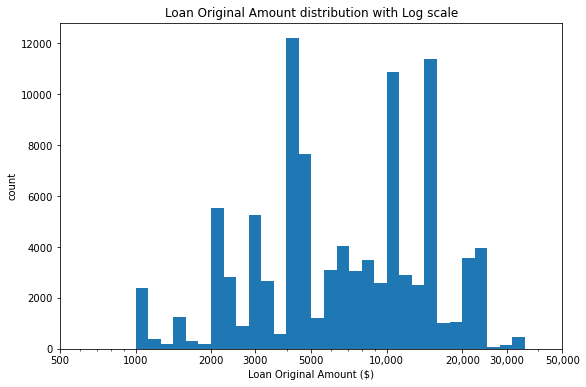

In [33]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.05
bins = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[9, 6])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1000', '2000', '3000', '5000', '10,000', '20,000', '30,000', '50,000'], rotation=0)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

**Observation**
* The largest original loan amount is between 3,000 to 5,000. Additionally, I see an uptick between 10K and 20K.

**Question**
- What is the distribution of LenderYied?

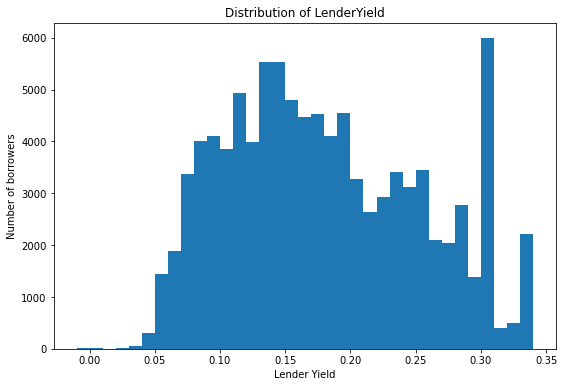

In [34]:
#Distribution of Lender Yield 
binsize = 0.01
bins = np.arange(df['LenderYield'].min(), df['LenderYield'].max()+binsize, binsize)
plt.figure(figsize=[9, 6])
plt.hist(data = df, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Distribution of LenderYield')
plt.ylabel('Number of borrowers')
plt.show()

**Observation**

Lender Yield is observed to be normally distributed, with the majority of values falling between 0.1 and 0.2, with an increase at 0.3

**Question**
- What is the distribution of Occupation among borrowers?

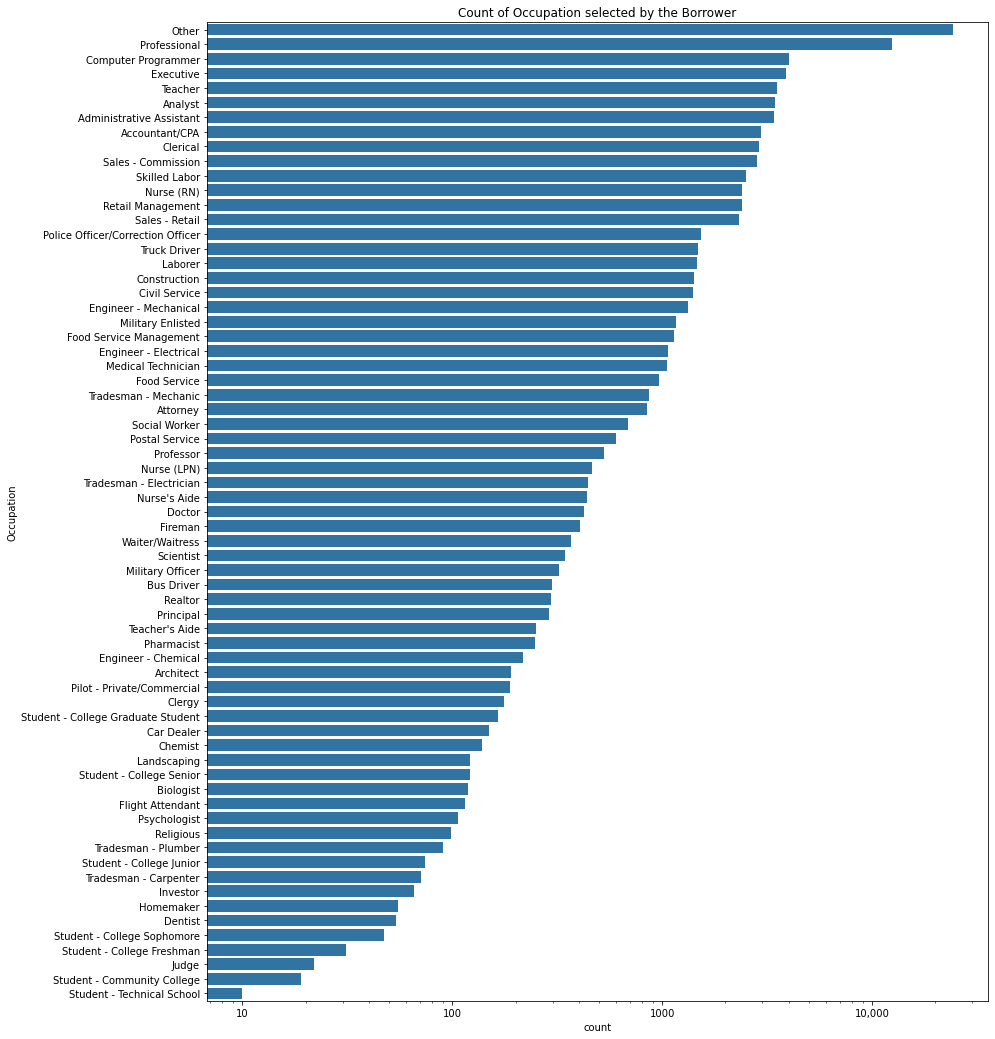

In [35]:
plt.figure(figsize = [14,18])
type_order = df['Occupation'].value_counts().index
g = sb.countplot(data=df, y='Occupation', color=base_color, order=type_order);
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 1e4], ['10', '100', '1000', '10,000'])
plt.title('Count of Occupation selected by the Borrower');


### Observation

Most of the borrowers belong to the others and professional category

**Question**
- How are borrowers didtributed among the states of USA?

In [36]:
# Finding the distribution of borrowers per state using the choropleth plot
fig = px.choropleth(locations=df['BorrowerState'].value_counts().index, 
                    locationmode='USA-states',
                    color= df['BorrowerState'].value_counts().values, 
                    scope="usa", 
                    hover_name=df['BorrowerState'].value_counts().index,
                    hover_data={'Borrowers':df['BorrowerState'].value_counts().values});
fig.layout.coloraxis.colorbar.title = 'Number of Borrowers'
fig.layout.title = 'Count of borrowers per each state are shown on a map of the United States.'
fig.show()

The documentation of the above plot was sourced from [plotly graphing library](https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html)

**Observation**

CA has the largest number of borrwers spanning over 13,000

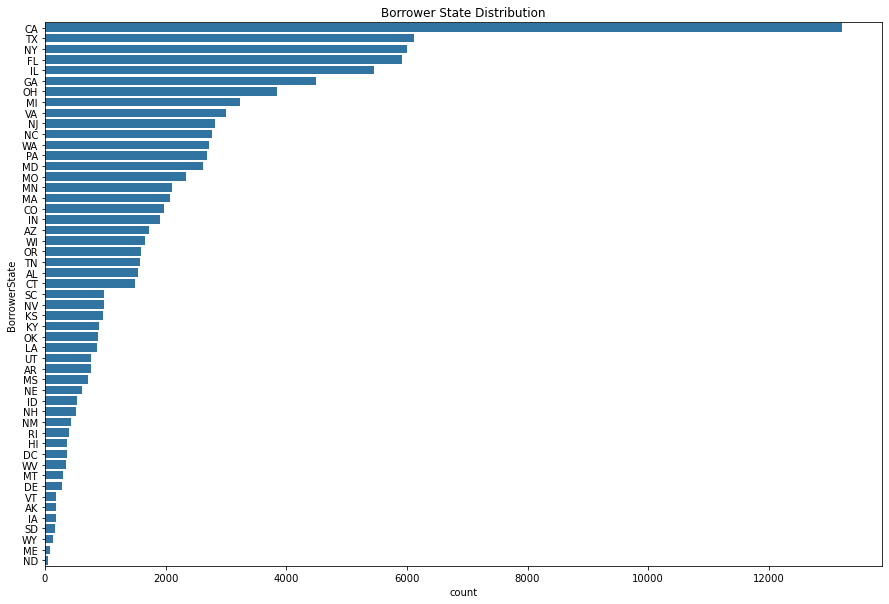

In [37]:
#Borrower State Distribution
cat_order = df['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=df,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');

### Observation

We can observe that the three states with the highest numbers of loans originated at that time were California (CA), Texas (TX), and New York (NY).

**Question**
- What is the distribution of LoanCurrentDaysDeliquent?

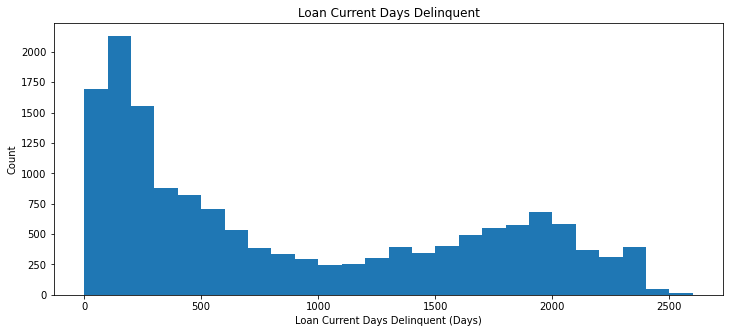

In [38]:
# Loan Current Days Delinquent Distribution
binsize = 100
bins = np.arange(0, df['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df[df['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count')
plt.show()

**Observation**

- Most of delinquent are on the first 500 days and the distribution is bimodal.

**Question**
- What is the distribution of Investors?

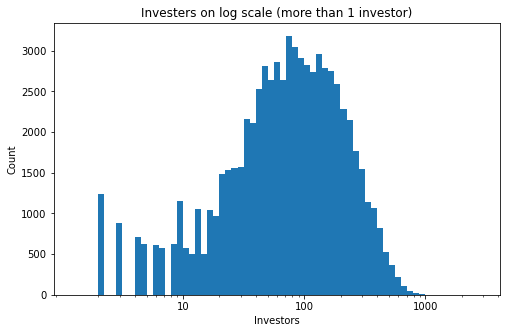

In [39]:
#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors', bins = bins)
plt.title('Investers on log scale (more than 1 investor)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

**Observation**

- The number of investors (for data with more than one investor) is usually always dispersed around 100, which was anticipated based on the previous data.

**Question**
- What is the distribution of MonthlyLoanPayment?

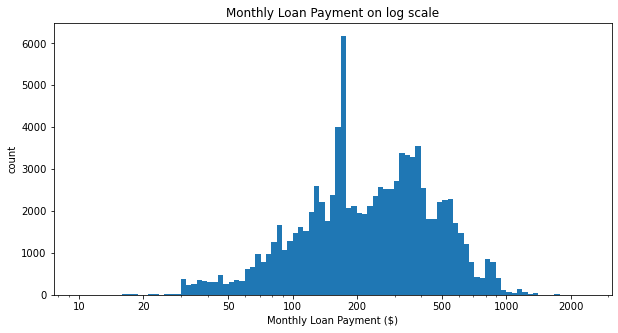

In [40]:
# Using log-scale to correct the long tail of the distribution
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment on log scale')
plt.show()

**Observation**

- The Monthly Loan Payment typically has a mode between 100 and 200. The values are more densed between 200 and 500

**Question**
- What is the distribution of ProsperRating?


In [90]:
def myPercentCountPlot(df, xVar, order=None, color=sb.color_palette()[0]):
    '''
    This function plots countplots of selected variables
    It takes a categorical variable from a dataframe and returns a plot 
    with frequences of the number of occurrences of each unit.
    '''
    # set plot dimensions
    plt.figure(figsize=[14,6])
    # plot
    c=sb.countplot(data=df, x =xVar, edgecolor = 'black', order=order, color=color);
    # clean up variable names after plotting
    xVar=xVar.replace("_"," ") # replace _ with a space
    # Add title and format it
    plt.title(f'Distribution of {xVar}'.title(), fontsize=14, weight='bold')
    # Add x label and format it
    plt.xlabel(f'{xVar}'.title(), fontsize =10, weight = 'bold')
    # Add y label and format it
    plt.ylabel('Number of People'.title(), fontsize =10, weight = 'bold')
    
    # annotate plot
    total=df.shape[0]
    for p in c.patches:
        c.annotate(f'{(p.get_height()*100)/total:.2f}%', # text (height of the plot)
                  (p.get_x()+p.get_width()/2,p.get_height()),
                  fontsize=12, weight='bold',
                  va='bottom', ha='center') # vertical alignment and horizontal alignment of text
        # despine
        sb.despine();

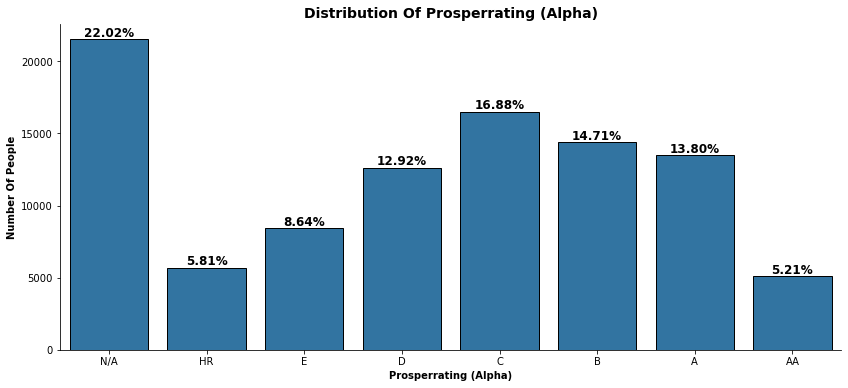

In [91]:
myPercentCountPlot(df, 'ProsperRating (Alpha)')

**Observation**

- The most common rating attained by most borrowers is C.
- 21528 of the borrowers got their loans before July 2009 and hence did not form part of the ProsperRating (Alpha)

**Question**
- What is the distribution of BorrowerIncomeRange?

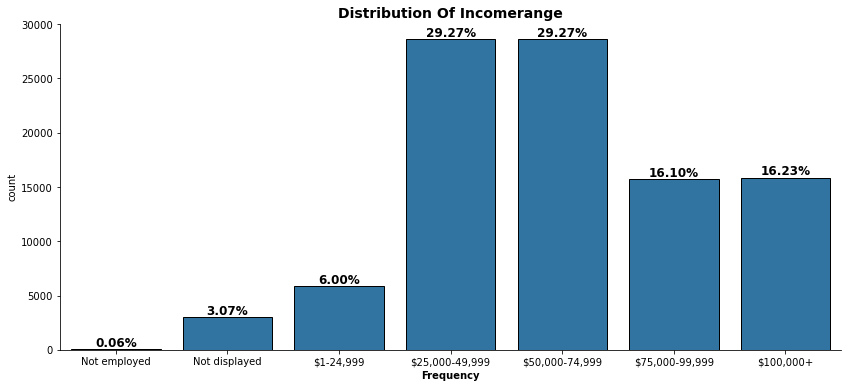

In [73]:
#Borrower Income Range Status Distrobution
myPercentCountPlot(df, 'IncomeRange')

**Observation**

Income Ranges of 25,000-49,999 and 50,000-74,999 are the largest group of borrowers.

**Question**
- What is the distribution of ListingCreationYear?

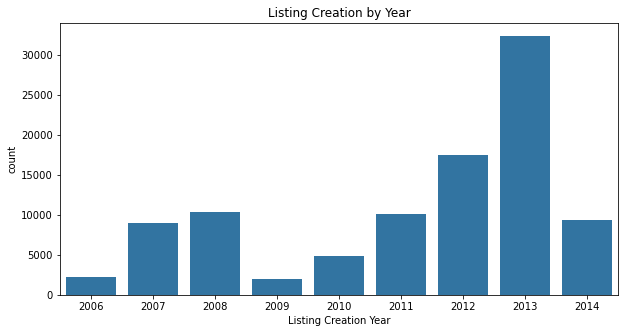

In [44]:
# Listing Creation  by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df,x=df['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

**Observation**

From 2009, the number of applicants have seen a continuous increase year on year until 2014 where the number of applicant fell deep

**Question**
- What is the distribution of DebtToIncome?

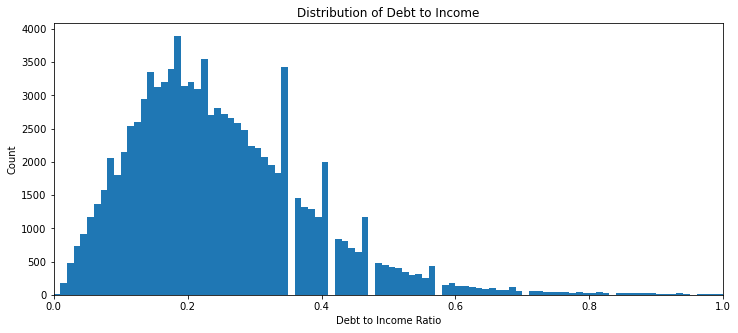

In [45]:
binsize = 0.01
bins = np.arange(df['DebtToIncomeRatio'].min() , df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.figure(figsize=[12, 5])
plt.hist(data = df, x= 'DebtToIncomeRatio', bins = bins)
plt.title('Distribution of Debt to Income');
plt.xlabel('Debt to Income Ratio');
plt.xlim(0,1);
plt.ylabel('Count');


**Observation**

The presence of people with very high incomes to their debt significantly skewed the distribution of the DebtToIncomeRatio. No adjustments to the data were made to take this into account because it is expected in a real-world scenario. It will be interesting to see how this influences the loan interest rates.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The Borrower Rate distribution looks to be normally distributed with a small left skew. a median located between a tiny peak centered at 15% and a large peak centered at 30%. A minor peak that is centered at 30% is also present. Additionally, it has been shown that a small number of loans have borrower rates that are higher than 35%. There is no requirement to carry out any transformations.

- I applied a log transformation to the distribution of loan original amount, which is right skewed, in order to interpret the picture. These variables, Monthly Loan Payment, Investors, and Amount Delinquent, likewise underwent the log transformation.

- The most loans were originated in the year 2013. The state of California (CA) had the most loans. Although the service costs were left skewed, I was unable to apply the log scale due to the negative amounts.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Because of the wide range of AmountDelinquent values, the distribution was extremely huge and I was unable to see it well, so I used the log transformation.

- In order to reveal the concealed distribution in some locations, the long-tailed, skewed distributions of particular features were evaluated on a log scale.

- The existence of people with relatively high salaries to their debt significantly skewed the distribution of the DebtToIncomeRatio. This is expected in a real-world scenario and does not require data changes to be applied. Just for dispersion, I've limited the x-axis.

---
## Bivariate Exploration
---
---


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97752 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingCreationDate        97752 non-null  datetime64[ns]
 1   Term                       97752 non-null  int64         
 2   LoanStatus                 97752 non-null  category      
 3   BorrowerAPR                97752 non-null  float64       
 4   BorrowerRate               97752 non-null  float64       
 5   LenderYield                97752 non-null  float64       
 6   ProsperRating (Alpha)      97752 non-null  category      
 7   ProsperScore               97752 non-null  object        
 8   ListingCategory (numeric)  97752 non-null  category      
 9   BorrowerState              97752 non-null  category      
 10  Occupation                 97752 non-null  category      
 11  EmploymentStatus           97752 non-null  category      
 12  Amo

In [47]:
df.head()

ListingCreationDate  Term LoanStatus  BorrowerAPR  BorrowerRate  \
0 2007-08-26 19:09:29.263    36  Completed      0.16516        0.1580   
1 2014-02-27 08:28:07.900    36    Current      0.12016        0.0920   
2 2007-01-05 15:00:47.090    36  Completed      0.28269        0.2750   
3 2012-10-22 11:02:35.010    36    Current      0.12528        0.0974   
4 2013-09-14 18:38:39.097    36    Current      0.24614        0.2085   

   LenderYield ProsperRating (Alpha) ProsperScore ListingCategory (numeric)  \
0       0.1380                   N/A          N/A                         0   
1       0.0820                     A          7.0                         2   
2       0.2400                   N/A          N/A                         0   
3       0.0874                     A          9.0                        16   
4       0.1985                     D          4.0                         2   

  BorrowerState  ... EmploymentStatus AmountDelinquent     IncomeRange  \
0            CO  ...    Self-employed            472.0  $25,000-49,999   
1            CO  ...         Employed              0.0  $50,000-74,999   
2            GA  ...    Not available    No Prior Loan   Not displayed   
3            GA  ...         Employed          10056.0  $25,000-49,999   
4            MN  ...         Employed              0.0       $100,000+   

  IncomeVerifiable  StatedMonthlyIncome  LoanCurrentDaysDelinquent  \
0             True          3083.333333                          0   
1             True          6125.000000                          0   
2             True          2083.333333                          0   
3             True          2875.000000                          0   
4             True          9583.333333                          0   

   DebtToIncomeRatio  LoanOriginalAmount  MonthlyLoanPayment  Investors  
0               0.17                9425              330.43        258  
1               0.18               10000              318.93          1  
2               0.06                3001              123.32         41  
3               0.15               10000              321.45        158  
4               0.26               15000              563.97         20  

[5 rows x 21 columns]

In [48]:
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors',
                    'AmountDelinquent','LoanCurrentDaysDelinquent', 'DebtToIncomeRatio']

In [49]:
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

**Question**
- What is the correlation between the variables of interest?

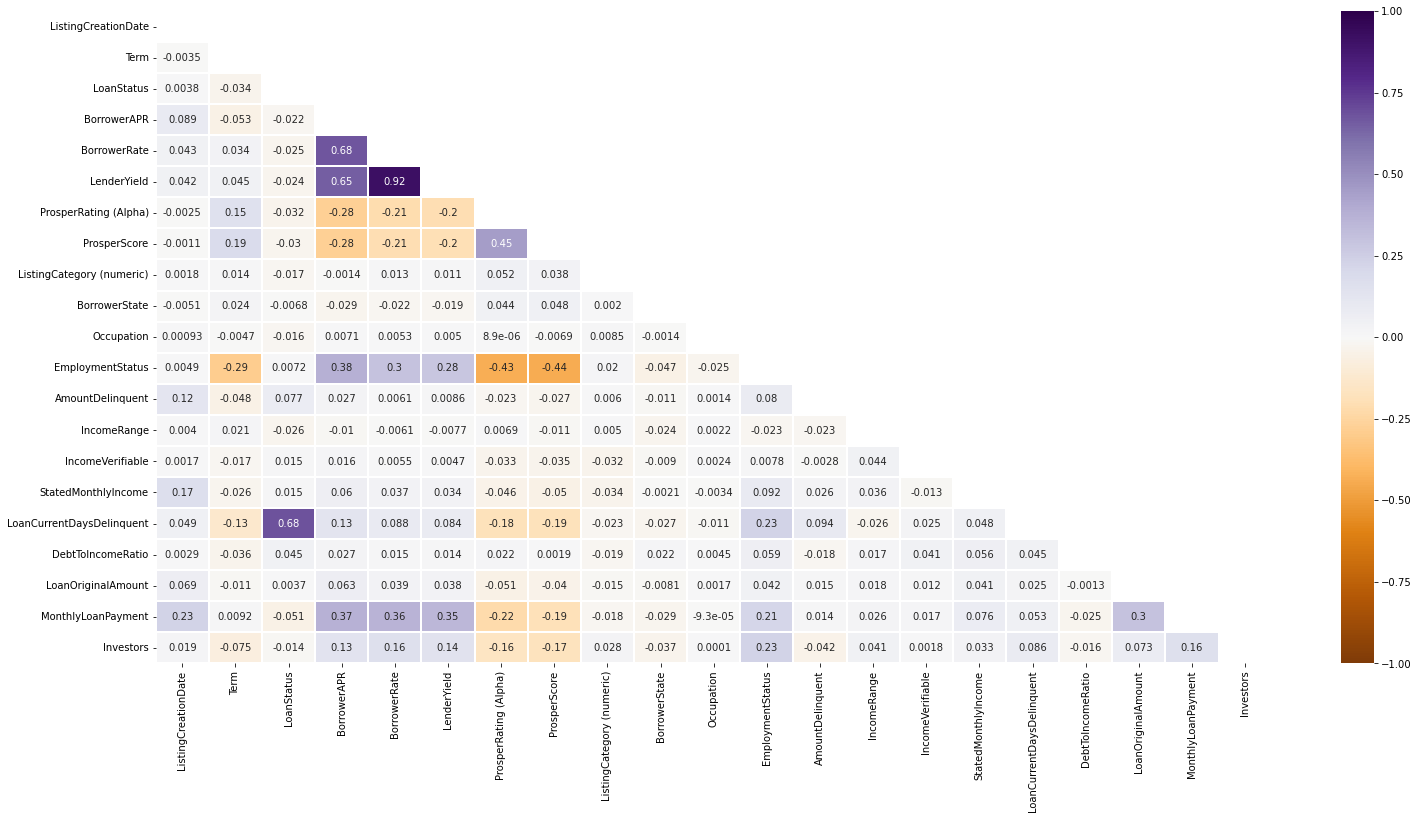

In [50]:
# # Correlation matrix for all numeric variables
# plt.figure(figsize = [12, 10])
# sb.heatmap(df[numeric_variables].corr(), annot = True, fmt = '.2f',
#            cmap = 'vlag_r', center = 0)
# plt.title('Correlation Matrix') 
# plt.show()


# Plotting the correlation between variables using a heatmap
plt.figure(figsize=(25,12));
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
# sb.heatmap(corr,annot=corr,cmap='twilight',fmt='.2g',mask=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sb.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='PuOr', vmin=-1, vmax=1 )


**Observation**

- There are significant positive relationships between LenderYield and BorrowerAPR, LenderYield and BorrowerRate. A positive link exists between Prosper Score and Prosper Rating. There is also a strong positive correlation between Loan Staus and LoanCurrentDaysDelinquent


- There is a negative association between Employment Status and Prosper rating, Employment Status and ProsperScore

**Question**
- What is the relationship between LoanOriginalAmount and BorrowerAPR?

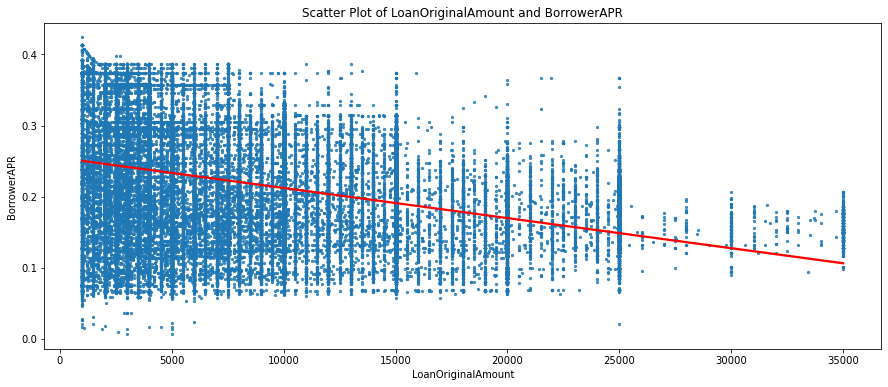

In [51]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR
# plot figure size
plt.figure(figsize = [15, 6]) 
# plot
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', 
           scatter_kws={'s':5}, line_kws={'color':'red'}) #resizing the points and chaging slope color to red
# plot title
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
# plot labels
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');




**Observation**

- We observe an inverse association between borrowerAPR and loan original amount, indicating that borrowers pay significantly less yearly interest on large loans.

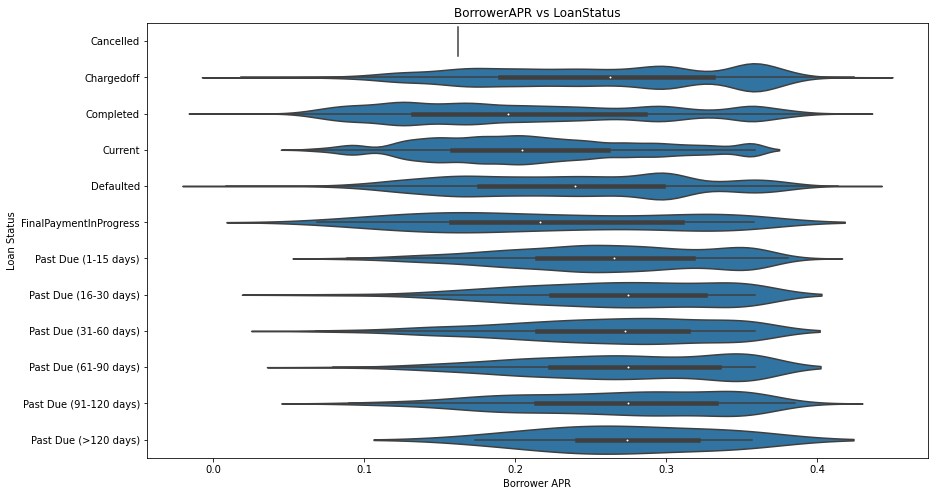

In [52]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [14, 8])
sb.violinplot(data=df,x='BorrowerAPR',y='LoanStatus',color=base_color, orient='h');
plt.title('BorrowerAPR vs LoanStatus');
plt.ylabel('Loan Status');
plt.xlabel('Borrower APR');
plt.xticks(rotation=0);


**Observation**

- It can ebe observed that Chargedoff Loans have the highest APR.
- Current and Completed loans have lower rate than the Past-Due loans.
- The APR of completed loans are lower than the mean

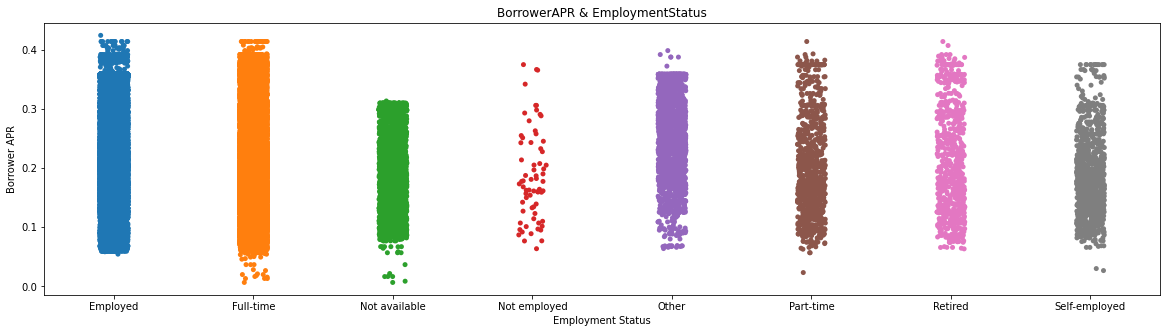

In [53]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])
sb.stripplot(data=df,y='BorrowerAPR',x='EmploymentStatus', );
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

**Observation**

- Full-time Employees and self-employed people pay the lowest APR whereas those who fall in the others category pay the highest.

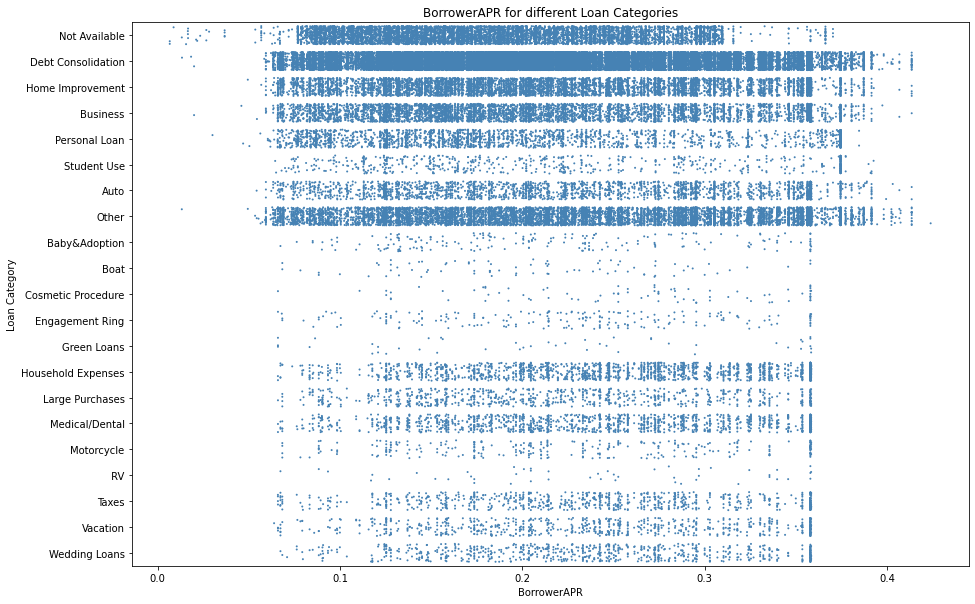

In [54]:
plt.figure(figsize = [15, 10])
sb.stripplot(data=df, x='BorrowerAPR', y='ListingCategory (numeric)',
             jitter=0.35, color='steelblue', orient='h', size=2);
plt.title('BorrowerAPR for different Loan Categories')
plt.xlabel('BorrowerAPR');
plt.ylabel('Loan Category');
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
           ['Not Available', 'Debt Consolidation', 'Home Improvement', 
            'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 
            'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring',
            'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 
            'Motorcycle',' RV', 'Taxes', 'Vacation', 'Wedding Loans'],
          rotation=0);

**Observation**

- It can be observed that Cosmetic Procedure are avaeragely given higest APR rates.
- Personal loans and Green loans receive relatively the lowest interest rates even Green Loans some of its rates scaling above 0.4%

---
---
<br>
- Listing Category: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans 
<br><br>

The listing categories can be verified by clicking [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0 'Data Dictionary')

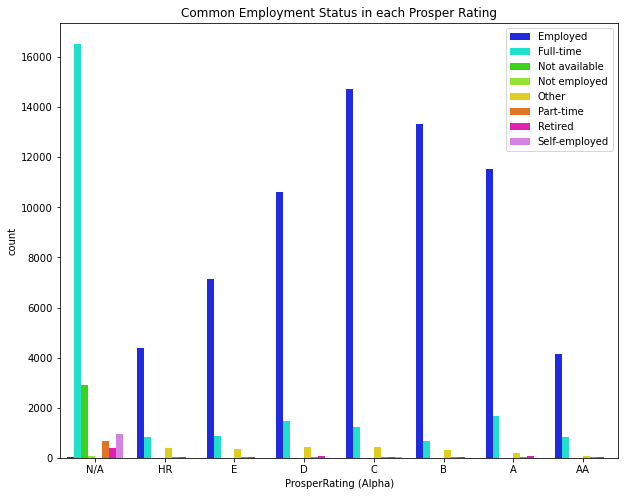

In [55]:
plt.figure(figsize = [10, 8])
sb.countplot(data=df, x='ProsperRating (Alpha)', hue='EmploymentStatus', palette='gist_ncar');
plt.legend(loc=1);
plt.title("Common Employment Status in each Prosper Rating");

**Observation**

- People with the employment statuses Not Employed, Self-employed, Retired, and Part-Time were found to be more prevalent in lower ratings.

**Question**
Which category of employee groups have the highest default rate?

In [56]:
# slicing the data to understand the borrowing behaviour of defaulters
defaulters = df[df['LoanStatus']=='Defaulted']

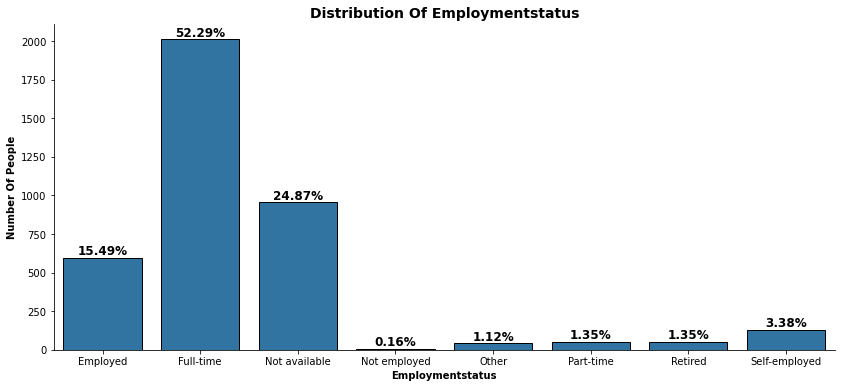

In [92]:
#Distribution of defaulters' employment status
myPercentCountPlot(defaulters, 'EmploymentStatus')

**Observation**
- People with full time employment are seen to have the highest default rate

---
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- According to the relationship between EmploymentStatus and BorrowerAPR: - Unemployed people pay higher interest rates than employed people.
- The interest rate is inversely correlated with income.

- Also, the higher the loan amount, the lesser the rate of interest charged on it
---

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a high interest rate on the loan status for past due payments.
- The proportion of self-employed borrowers with defaulted debts is higher than that of unemployed borrowers.

---
## Multivariate Exploration
---

In [58]:
for lab in ['BorrowerAPR','BorrowerRate']:
    bins = np.arange(0,df[lab].max()+0.04,0.04)
    bins = [round(x,2) for x in bins]
    df[f'{lab} cat'] = pd.cut(x=df[lab],bins=bins,labels=bins[1:],include_lowest=False)

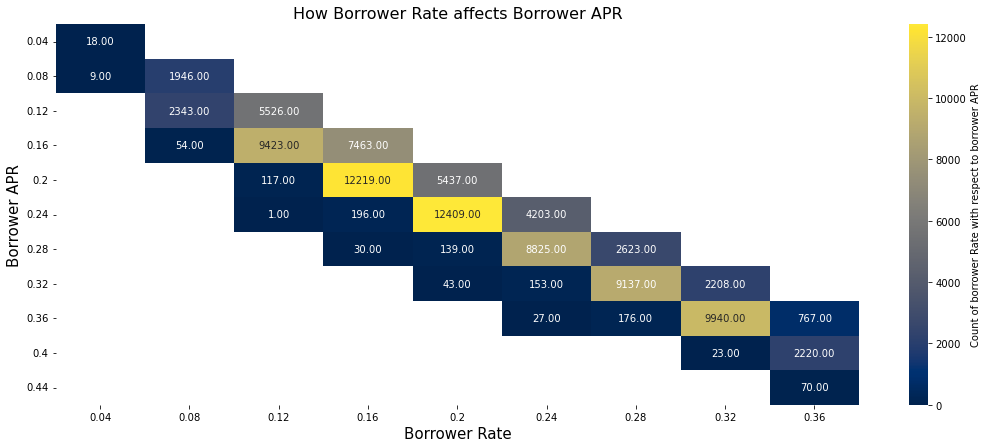

In [59]:
plt.figure(figsize=(18, 7))
sb.heatmap(df.groupby(['BorrowerAPR cat','BorrowerRate cat']).size().unstack('BorrowerRate cat').replace({0:np.nan}),annot=True,
           fmt='.2f',cmap='cividis',vmin=0,cbar_kws={'label':'Count of borrower Rate with respect to borrower APR'})
plt.title('How Borrower Rate affects Borrower APR',fontdict={'size':16})
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15})
plt.yticks(rotation=0)
plt.show();

**Observation**

From the heat map above, I have noted the following:

- The relationship between borrower rate and borrower APR is strong. Therefore, if we raise the borrower APR, the borrower rate will follow suit, and vice versa.
- APR and Rate for high borrowers range from 0.1 to 0.2.(note yellow area)
- The borrower APR and borrower Rate count both rise between 0.05 and 0.2. Borrower APR and rate reductions range from 0.2 to 0.35.

**Question**

How does LenderYield and ProsperRating Affect BorrowerAPR?

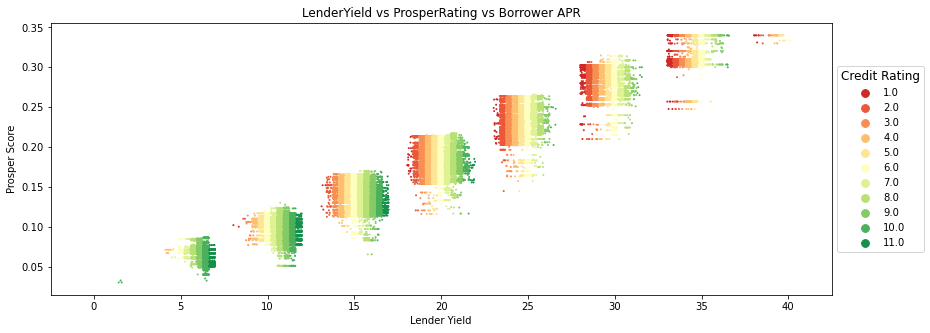

In [60]:
# removing N/A from ProsperScore
no_na_df = df.dropna(subset=['ProsperScore', 'BorrowerAPR'])
no_na_df = no_na_df[no_na_df['ProsperScore'] != "N/A"]

# create categories for BorrowerAPR
no_na_df['BorrowerAPR_cat'] = (((no_na_df['BorrowerAPR']*100)//5)*5).astype(int);

# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [14, 5])
sb.stripplot(data=no_na_df, y='LenderYield', x= 'BorrowerAPR_cat', hue= 'ProsperScore', 
             jitter=0.35, dodge=True, palette='RdYlGn', size=2)

plt.title('LenderYield vs ProsperRating vs Borrower APR');
plt.xlabel('Lender Yield');
plt.ylabel('Prosper Score');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), title='Credit Rating', title_fontsize=12);

**Observation**

- All of the variables' relationships are evident, as can be seen. The lender yield and borrower APR have a direct positive inverse relationship, with the lender yield rising as the borrower pays more interest. Lower borrower interest rates and hence lower lender yields result with higher credit scores.

**Question**

What is the relationship between Loan Status and APR with respect to each employment status?

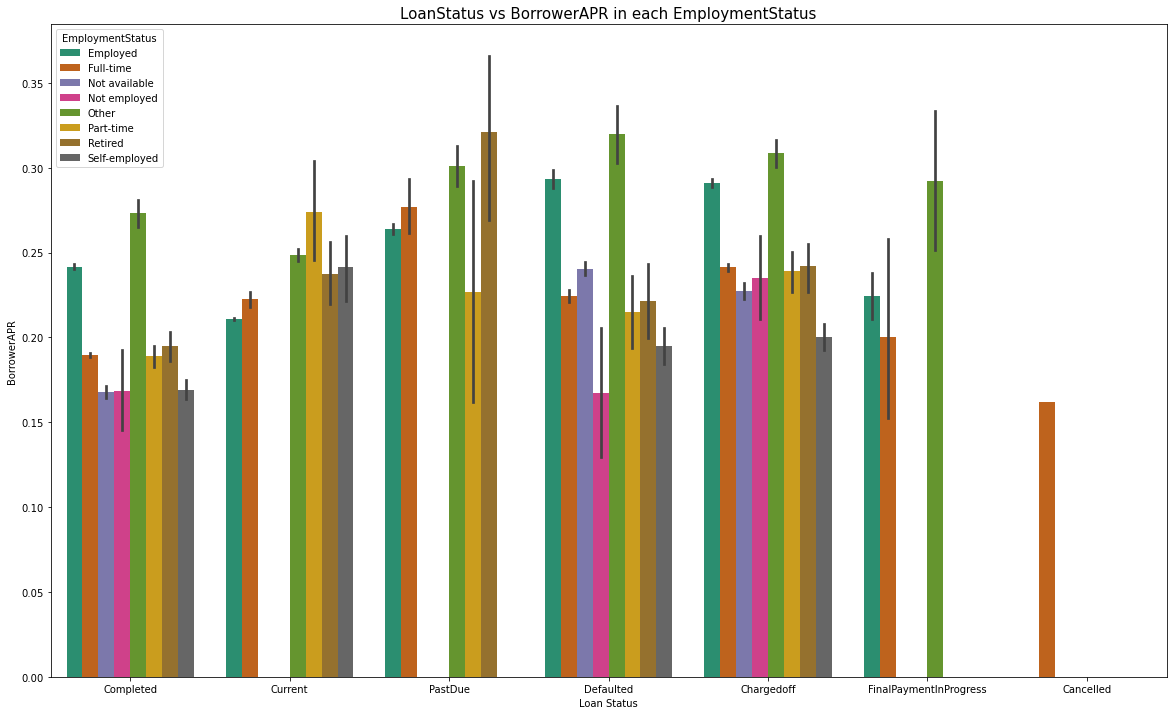

In [61]:
df['LoanStatus_new'] =df['LoanStatus'].astype(str)
# categories with Past Due
mask =df['LoanStatus_new'].str.contains('Past Due')
# change all to Past Due
df.loc[mask, 'LoanStatus_new']= 'PastDue'

# LoanStatus vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.barplot(x='LoanStatus_new', y='BorrowerAPR', hue='EmploymentStatus', data=df, palette="Dark2");
plt.title('LoanStatus vs BorrowerAPR in each EmploymentStatus', fontdict={'size':15});
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');

**Observation**

- The loan status categories with the lowest APRs are employed and full-time. The greatest APR is for those who are unemployed. The majority of the high borrowerAPRs are completed, current, and charged off. In terms of chargeoff and defaulted loan status, we observe several anomalies.

- The insight here will require delving deeper to see how APR plays a role among defalters

**Question**
1. Which category of defaulters are are charged the highest APR?
2. Which loan term has the highest defaulters

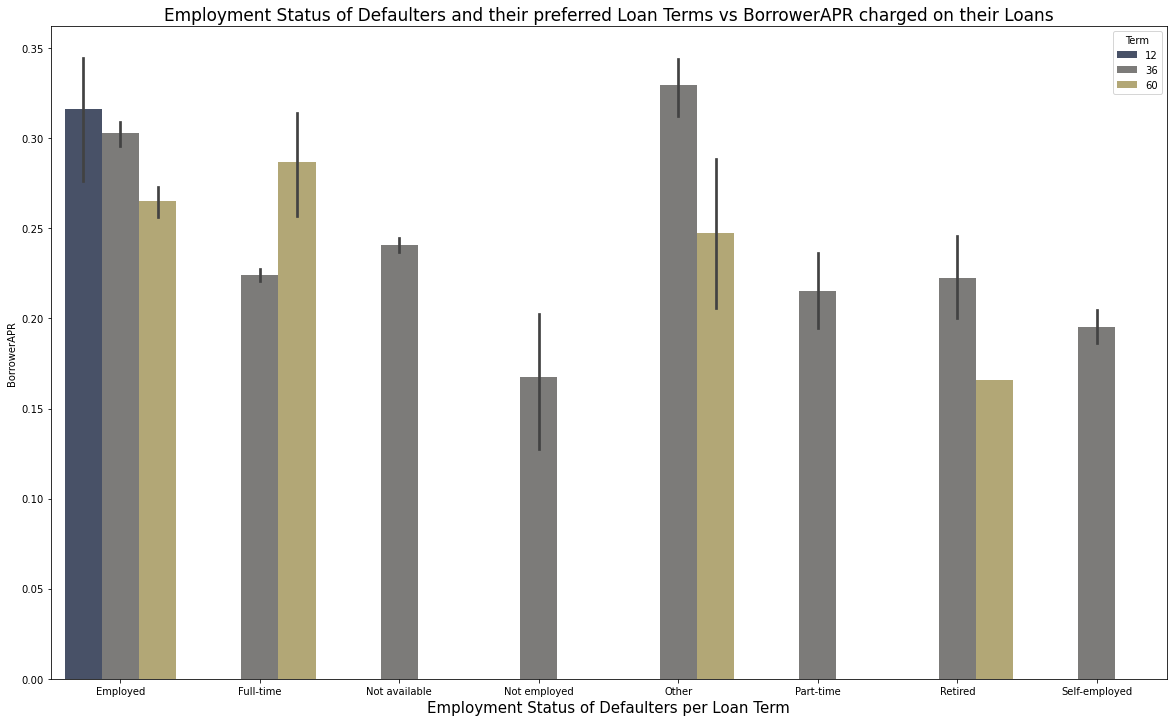

In [62]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.barplot(x="EmploymentStatus", y="BorrowerAPR", data=defaulters, hue="Term", palette="cividis");
plt.title('Employment Status of Defaulters and their preferred Loan Terms vs BorrowerAPR charged on their Loans', fontdict={'size':17});
plt.xlabel('Employment Status of Defaulters per Loan Term', fontdict={'size':15});
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 0);

**Observation**

- Interestingly, unemployed borrowers tend to pay the least BorrowerAPR even though they may seem to be associated with the highest risk.

- It is also clear that the unemployed tend to prefer loan for a term of 36months.

- It is obvious that only employed defaulters that take on loans for a 12 months term. 

**Question**
- What is the relationship between defaulters and their alpha ratings per employment status?

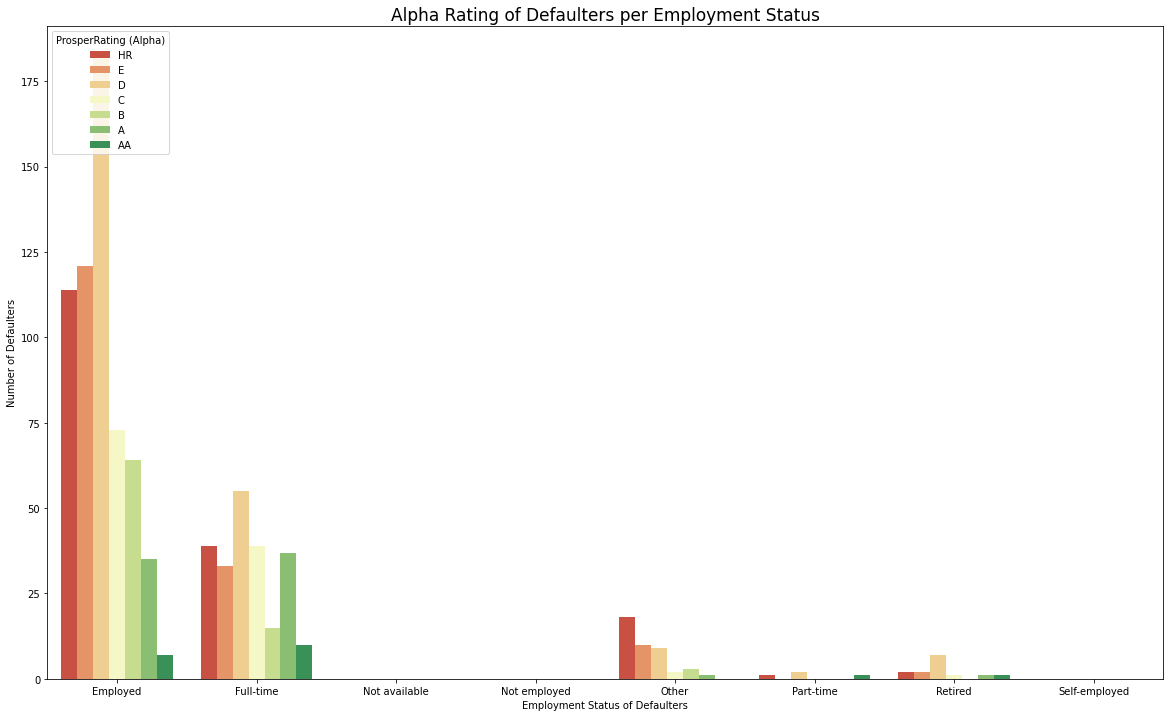

In [63]:
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

plt.figure(figsize=[20,12])
sb.countplot(data=defaulters, x='EmploymentStatus', hue='ProsperRating (Alpha)',
            palette='RdYlGn', hue_order=rating_order);
plt.xlabel("Employment Status of Defaulters");
plt.ylabel('Number of Defaulters');
plt.title('Alpha Rating of Defaulters per Employment Status', fontdict= {'size':17});

**Observation**

- It is very obvious that most of the defaulters were coming from the employed group.

- Obviously, those rated D are the highest group of defaulters 

**Question**

What is the relationship between EmploymentStatus, BorrowerAPR with respect to LoanStatus?

**Question**

Analyze how the BorrowerRate changes for different loan Terms when split up by ProsperRating

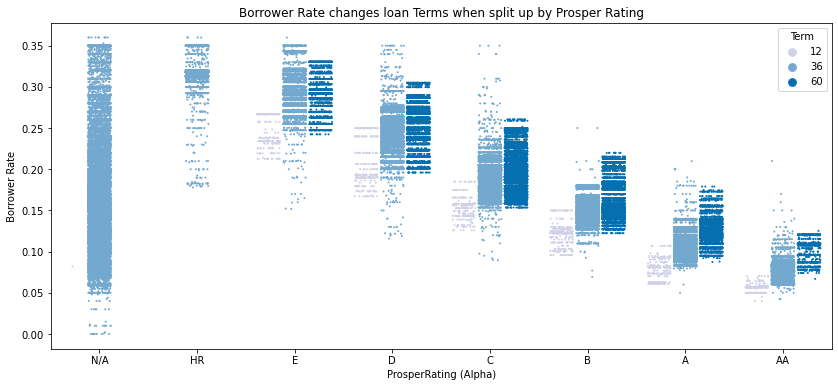

In [64]:
# Create a stripplot to show how the BorrowerRate changes for different loan Terms
# when split up by ProsperRating
plt.figure(figsize=[14,6])

sb.stripplot(data=df, x='ProsperRating (Alpha)', y='BorrowerRate', hue='Term',
                   jitter=0.35, dodge=True, palette='PuBu', size=2);
plt.legend(loc=1, title='Term');
plt.title('Borrower Rate changes loan Terms when split up by Prosper Rating');
plt.ylabel(' Borrower Rate ');

**Observation**

- From the graph, the higher the rating, the lower the interest rate charged. Thus, clients with AA ratings pay the least interest rates on their amounts borrowed.

- Again, the borrower rate rises for loans with longer terms at every level of ProsperRating (Alpha). Given that loans with shorter terms typically have lower interest rates.

**Question**

How does ProsperRating affect BorrowerAPR and LoanAmount?

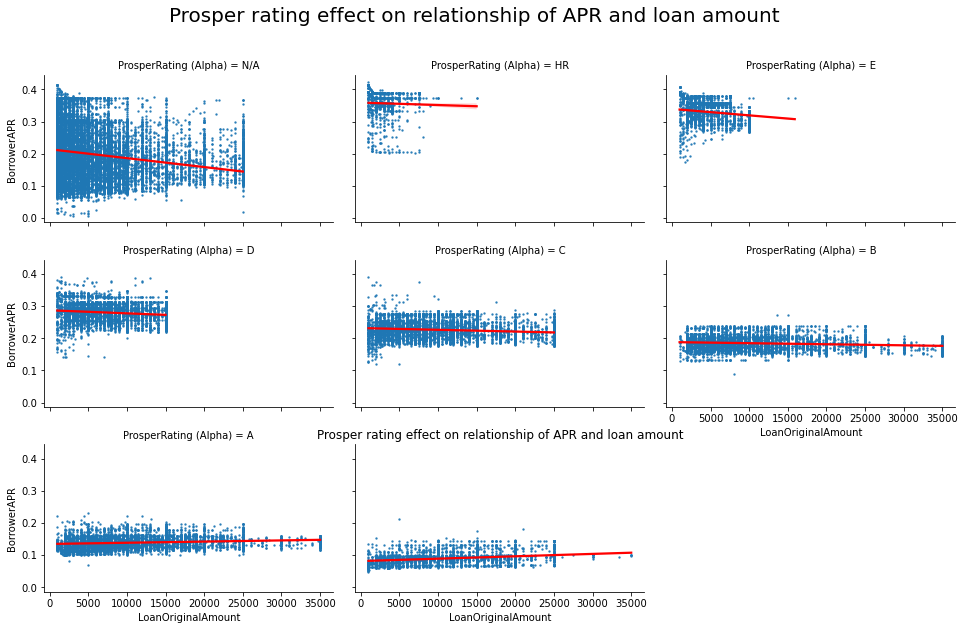

In [65]:
# Prosper rating effect on relationship of APR and loan amount
grid=sb.FacetGrid(data=df, col='ProsperRating (Alpha)', col_wrap=3)
grid.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR',  scatter_kws={'s':2}, line_kws={'color':'red'});
plt.title('Prosper rating effect on relationship of APR and loan amount');
grid.fig.suptitle('Prosper rating effect on relationship of APR and loan amount', fontsize=20, y=1.08);
grid.add_legend();

grid.fig.set_size_inches(14, 8);

**Observation**

The better rating results in a larger loan amount. The better the rating, the lower the APR for the borrower. It's interesting to note that as Prosper ratings rise from HR to A or higher, the correlation between borrower APR and loan amount changes from being negatively to marginally positively. This might be the case since borrowers with A or AA ratings frequently take out larger loans, therefore raising the APR might deter them from doing so and maximize the profit. Lowering the borrower's APR might persuade them to borrow more since people with worse ratings often borrow less money.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Relation between EmploymentStatus, LoanStatus and BorrowerAPR:
- We see that Employed people are diverse regarding the Loan Status and BorrowerAPR as they have sometimes high borrower rate like in chargeoff and sometimes low borrower rate like in the past dues.
- Employees with Full-Time and part-time tend to have lower BorrowerAPR across all loan status categories.
- Employees with Not-Employed & Self-Employed tend to have higher BorrowerAPR in some areas like the past dues but lower BorrowerAPR in the current and completed status.


### Were there any interesting or surprising interactions between features?

- ProsperScore and BorrowerAPR were discovered to be negatively correlated, as higher prosper scores indicate lower risk associated with the loan, which in turn results in lower APRs, which further reduce yield.